In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
data = pd.read_csv("rimini_climate.txt", sep=",")

In [57]:
print("----------------\nData exploration\n----------------")
print(data.info())
print(data.describe())
print(data.shape)
print(data.head(5))
print("----------------")

----------------
Data exploration
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920430 entries, 0 to 920429
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      920430 non-null  int64  
 1   min_temp  920430 non-null  float64
 2   max_temp  920430 non-null  float64
 3   temp      920430 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 28.1 MB
None
               date       min_temp       max_temp           temp
count  9.204300e+05  920430.000000  920430.000000  920430.000000
mean   1.990568e+07       8.829380      17.349964      13.089737
std    1.731816e+05       6.731109       8.276298       7.331018
min    1.961010e+07     -16.700000     -11.100000     -12.000000
25%    1.976010e+07       3.400000      10.700000       7.000000
50%    1.991010e+07       9.000000      17.400000      13.100000
75%    2.006010e+07      14.300000      24.200000      19.200000
max    2.020123e+07    

In [58]:
data = data.drop(columns=["min_temp", "max_temp"])

data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")
data.reset_index(drop=True, inplace=True)
data = data.set_index("date")

In [59]:
print("----------------\nData after drop min_temp, max_temp\n----------------")
print(data.head(5))
print("----")

----------------
Data after drop min_temp, max_temp
----------------
            temp
date            
1961-01-01   1.5
1961-01-02   3.4
1961-01-03   3.1
1961-01-04   3.4
1961-01-05   3.3
----


In [60]:
# check data distribution
A, M, R, STD = data["temp"].median(), data["temp"].mean(), data["temp"].max() - data["temp"].min(), data["temp"].std()
print(A,M,R, STD)
# 68-95-99.7 rule
# 68 % of data are A - STD <= x <= a + STD

perc68 = sum((data["temp"] >= A - STD) & (data["temp"] <= A + STD)) / len(data["temp"])
print(f"{round(perc68 * 100, 2)}% of data lie between {A - STD} and {A + STD} - Test {'failed' if perc68 < 0.68 else 'passed'}")

# check if 95 % of data are A - 2STD <= x <= A + 2STD
perc95 = sum((data["temp"] >= A - (2*STD)) & (data["temp"] <= A + (2*STD))) / len(data["temp"])
print(f"{round(perc95 * 100, 2)}% of data lie between {A - 2*STD} and {A + 2*STD} - Test {'failed' if perc95 < 0.95 else 'passed'}")

# 99.7 % of data are A - 3STD <= x <= A + 3STD
perc997 = sum((data["temp"] >= A - (3*STD)) & (data["temp"] <= A + (3*STD))) / len(data["temp"])
print(f"{round(perc997 * 100, 2)}% of data lie between {A - 3*STD} and {A + 3*STD} - Test {'failed' if perc997 < 0.997 else 'passed'}")

13.1 13.089736536184175 45.8 7.3310184919617605
61.26% of data lie between 5.768981508038239 and 20.43101849196176 - Test failed


98.42% of data lie between -1.5620369839235213 and 27.762036983923522 - Test passed
99.99% of data lie between -8.893055475885282 and 35.09305547588528 - Test passed


In [61]:
z_score = (np.sort(data["temp"]) - A) / STD
print(z_score[:10])

[-3.42380803 -3.42380803 -3.35560469 -3.31468268 -3.30104201 -3.27376067
 -3.26012    -3.24647933 -3.24647933 -3.23283866]


In [62]:
from scipy.stats import norm
cum_z_scores = norm.cdf(z_score)

print(cum_z_scores[len(data["temp"] )// 2])

0.5


In [63]:
"""
    siccome abbiamo un dataset di temperature e di solito i fenomeni naturali seguono una distribuzione gaussiana,
    abbiamo eseguito i test di normalità per verificare questo fatto
"""


'\n    siccome abbiamo un dataset di temperature e di solito i fenomeni naturali seguono una distribuzione gaussiana,\n    abbiamo eseguito i test di normalità per verificare questo fatto\n'

<Axes: >

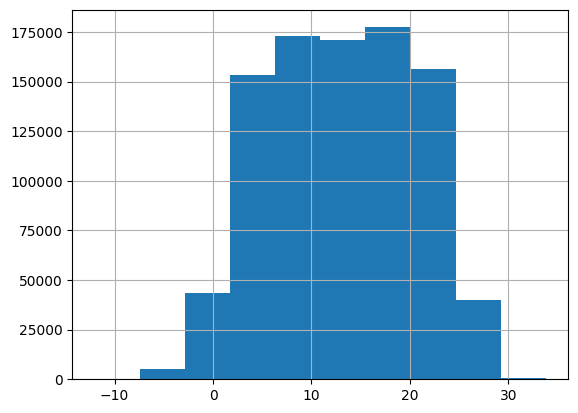

In [64]:
pd.Series(data["temp"]).hist()

In [65]:
tot_years = 2011 -1961

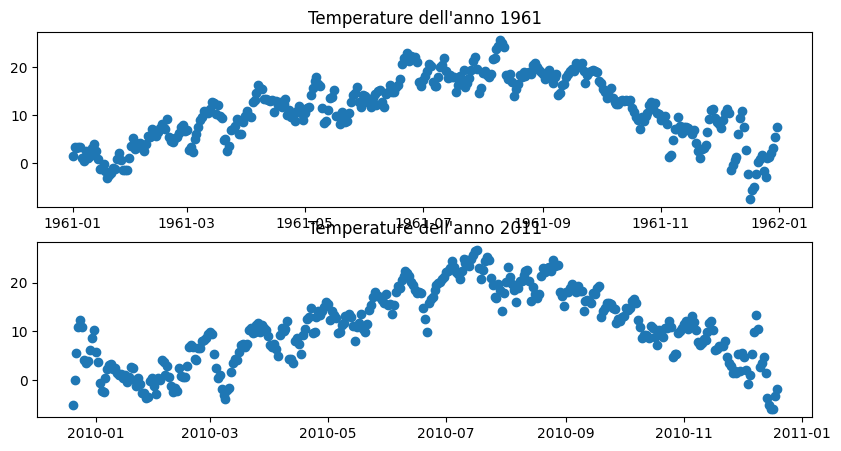

In [66]:
fig, axs = plt.subplots(2,1)
fig.set_size_inches((10, 5))
axs[0].set_title("Temperature dell'anno 1961")
axs[1].set_title("Temperature dell'anno 2011")
axs[0].scatter(x = data.index[:365],  y = data["temp"][:365])
axs[1].scatter(x = data.index[(365*(tot_years-1)):(365*tot_years)],  y = data["temp"][365*(tot_years-1):(365* tot_years)])
plt.show()

In [67]:
# raggruppiamo le temperature ottenute in zone diverse di Rimini per lo stesso giorno aggregandole con la media
data["month"] = data.index.month
data["year"] = data.index.year

year        1961       1962       1963       1964       1965       1966  \
month                                                                     
1       2.742627   4.828802  -0.369662   0.995084   4.131720   1.127880   
2       7.386990   4.199745   0.781037   4.729310   2.047364   8.537160   
3      10.025653   4.953917   7.032335   7.524501   7.577880   7.976421   
4      14.488333  11.244286  12.400159  12.888095   9.773889  13.097857   
5      15.852611  15.573195  16.082873  16.662289  14.849078  15.538710   
6      20.266667  18.824603  20.214921  20.955000  19.037063  20.158254   
7      21.415745  21.775422  22.569124  21.525730  22.036252  21.250538   
8      22.357296  24.360522  21.842089  21.232181  20.498310  21.515054   
9      20.619365  19.520794  18.919841  18.211032  17.223651  19.470714   
10     15.363287  14.139017  13.245392  12.948157  13.462442  16.533333   
11      9.101429   7.843333  12.927857   8.304603   9.241905   7.436190   
12      4.326267   2.4946

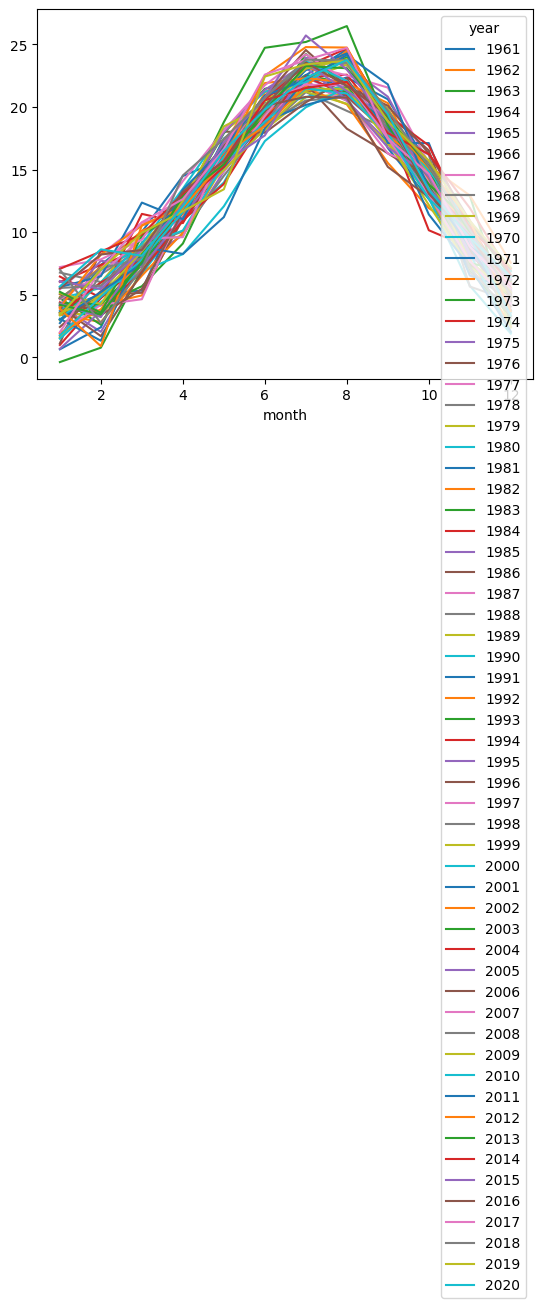

In [68]:

# aggreghiamo le informazioni 
pivot_month = pd.pivot_table(data, values = "temp", index="month", columns="year", aggfunc="mean")
print(pivot_month)
pivot_month.plot()
plt.show()

In [69]:
data

,temp,month,year
date,,,
1961-01-01,1.5,1,1961
1961-01-02,3.4,1,1961
1961-01-03,3.1,1,1961
1961-01-04,3.4,1,1961
1961-01-05,3.3,1,1961
...,...,...,...
2020-12-27,3.3,12,2020
2020-12-28,6.1,12,2020
2020-12-29,8.9,12,2020


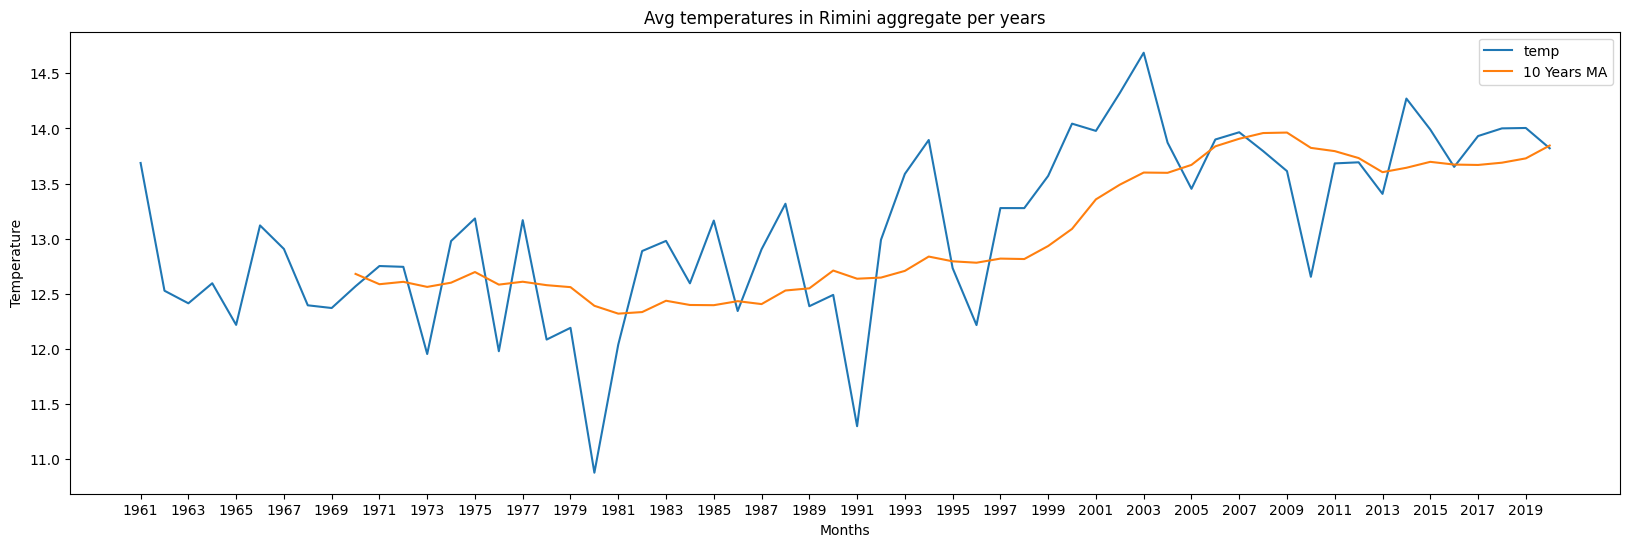

In [70]:
year_avg = pd.pivot_table(data, values='temp', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['temp'].rolling(10).mean()
year_avg[['temp','10 Years MA']].plot(figsize=(20,6))
plt.title('Avg temperatures in Rimini aggregate per years')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1961,2021,2)])
plt.show()

In [71]:
# come ci si poteva aspettare notiamo un trend crescente per la temperatura media annuale 

In [72]:
pivot_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1961    12 non-null     float64
 1   1962    12 non-null     float64
 2   1963    12 non-null     float64
 3   1964    12 non-null     float64
 4   1965    12 non-null     float64
 5   1966    12 non-null     float64
 6   1967    12 non-null     float64
 7   1968    12 non-null     float64
 8   1969    12 non-null     float64
 9   1970    12 non-null     float64
 10  1971    12 non-null     float64
 11  1972    12 non-null     float64
 12  1973    12 non-null     float64
 13  1974    12 non-null     float64
 14  1975    12 non-null     float64
 15  1976    12 non-null     float64
 16  1977    12 non-null     float64
 17  1978    12 non-null     float64
 18  1979    12 non-null     float64
 19  1980    12 non-null     float64
 20  1981    12 non-null     float64
 21  1982    12 non-null     float64
 22  1983    1

In [73]:
data

,temp,month,year
date,,,
1961-01-01,1.5,1,1961
1961-01-02,3.4,1,1961
1961-01-03,3.1,1,1961
1961-01-04,3.4,1,1961
1961-01-05,3.3,1,1961
...,...,...,...
2020-12-27,3.3,12,2020
2020-12-28,6.1,12,2020
2020-12-29,8.9,12,2020


In [74]:
# prima di procedere con il training dei modelli aggreghiamo i dati per mese tramite media
group_df = data.groupby(["year", "month"])["temp"].mean().reset_index(name ='temp')
group_df
print(group_df)

     year  month       temp
0    1961      1   2.742627
1    1961      2   7.386990
2    1961      3  10.025653
3    1961      4  14.488333
4    1961      5  15.852611
..    ...    ...        ...
715  2020      8  23.750154
716  2020      9  19.433016
717  2020     10  13.385100
718  2020     11   9.565714
719  2020     12   6.431951

[720 rows x 3 columns]


In [75]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import math
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Rimini Temperatures')
    plot_acf(x= y, lags=lags_plots, zero=False, ax=ax2);
    
    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                  -4.1880
p-value                          0.0007
Lags Used                       20.0000
Number of Observations Used    699.0000
Critical Value (1%)             -3.4397
Critical Value (5%)             -2.8657
Critical Value (10%)            -2.5690
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


/tmp/ipykernel_2417/4019671754.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adftest[0].round(2) < adftest[5].round(2):


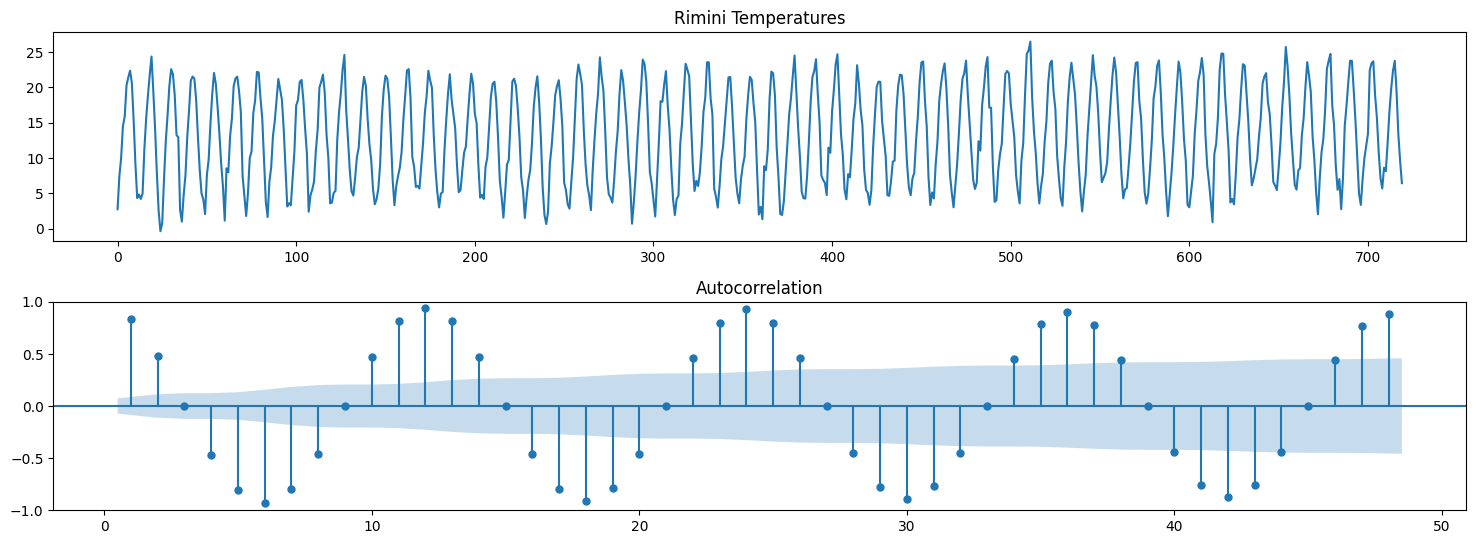

In [76]:
check_stationarity(group_df["temp"])

<Axes: >

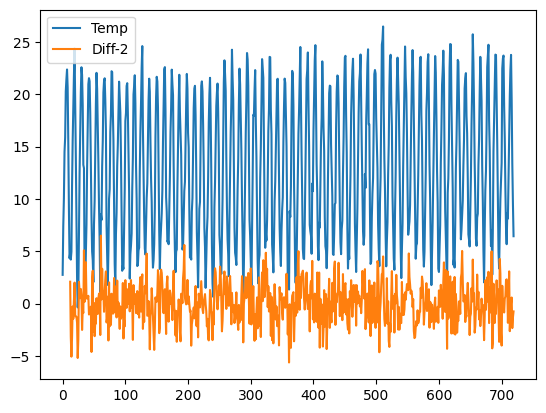

In [77]:
group_df["temp"].plot(label="Temp",legend=True)
group_df["temp"].diff(12).plot(label="Diff-2",legend=True)


### PREDICTION AND FORECASTING

In [183]:
serie = group_df["temp"].values
i = int(len(serie) * 0.9) # 54 anni per il train
j = int(len(serie) * 0.1) # 6 anni per il test

train, test = serie[:i], serie[-j:]
assert(len(train) + len(test) == len(serie))

In [185]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import mse, rmse
import itertools 

In [186]:
def arima_grid_search(data):
    best_params = None
    p = d = q = range(0, 4)
    pdq = list(itertools.product(p, d, q))
    best_aic = float('inf')
    for param in pdq:
        model = ARIMA(data, order = param)
        fitted_model = model.fit()
        if best_aic > fitted_model.aic:
            best_params = param 
            best_aic = fitted_model.aic  
    return best_params          

In [ ]:
best_params = arima_grid_search(group_df["temp"])
model = ARIMA(train, order = best_params)
fitted_model = model.fit()
fc_values = fitted_model.forecast(len(test))
print(mse(fc_values, test))

In [188]:
import numpy as np
from scipy.optimize import minimize
from statsmodels.tsa.arima.model import ARIMA

def nelder_mead_arima(data):
    # Funzione obiettivo per minimizzare
    def objective(params, data):
        p, d, q = params
        print(params)
        differenced_series = np.diff(data, n=int(d))
        model = ARIMA(differenced_series, order=(int(p), int(d), int(q)))
        fitted_model = model.fit()
        predictions = fitted_model.predict(start=int(d), end=len(differenced_series)-1, dynamic=False)
        mse = ((predictions - differenced_series[int(d):]) ** 2).mean()
        return predictions.mean()
    
    # Valori iniziali dei parametri
    initial_params = [2,0,2]
    
    # Minimizza la funzione obiettivo utilizzando Nelder-Mead
    result = minimize(objective, initial_params, args=(data), method='Nelder-Mead')
    
    # Parametri stimati
    estimated_params = result.x
    print("Parametri stimati:", estimated_params)

In [ ]:
nelder_mead_arima(group_df["temp"])

In [84]:
group_df.index.array

<NumpyExtensionArray>
[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
 ...
 710, 711, 712, 713, 714, 715, 716, 717, 718, 719]
Length: 720, dtype: int64

In [87]:
from scipy.optimize import curve_fit
def arima_forecast(data, p,d,q):
    model = ARIMA(data, order=(int(p), int(d), int(q)))
    fitted_model = model.fit()
    predictions = fitted_model.predict(len(data), len(data))
    return predictions
params, _ = curve_fit(arima_forecast, np.arange(len(group_df["temp"])), group_df["temp"], p0=(0,0,0))
print(params)


[0. 0. 0.]


In [ ]:
from scipy.optimize import curve_fit

def arima_forecast(data, p,d,q):
    model = ARIMA(data, order=(int(p), int(d), int(q)))
    fitted_model = model.fit()
    predictions = fitted_model.predict(len(data), len(data))
    return predictions
params, _ = curve_fit(arima_forecast, np.arange(len(group_df["temp"])), group_df["temp"], p0=(0,0,0))
print(params)


In [189]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [ ]:
### MLP PREDICTION

In [191]:
def create_dataset_mlp(data, w):
    x, y = list(), list()
    for i in range(0, len(data)-w, w):
        x.append(data[i: i+w])
        y.append([data[i+w]])
    return np.array(x), np.array(y)

In [246]:
win = 1
train_x, train_y = create_dataset_mlp(train, win)
testdata = np.concatenate((train[-win:],test))
test_x, test_y = create_dataset_mlp(testdata, win) 

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = win,  activation = "relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(train_x, train_y, epochs=200)
model.summary()

In [204]:
trainScore = model.evaluate(train_x, train_y, verbose=0)

In [ ]:
testScore = model.evaluate(test_x, test_y, verbose=0)
print(testScore)

In [ ]:
mlp_test_predict = model.predict(test)

In [ ]:
### LSTM PREDICTION

In [221]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(train.reshape(-1, 1))
scaled_train_data = scaler.transform(train.reshape(-1, 1))
scaled_test_data = scaler.transform(test.reshape(-1, 1))

In [222]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12 
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input,
batch_size=1)

In [ ]:
# init LSTM 
model = Sequential()
model.add(LSTM(15, activation="relu", input_shape =(n_input, n_features), dropout=0.05))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(generator,epochs=35)
model.summary()

In [ ]:
# model evaluation
preds_scaled = list()
batch = scaled_train_data[-n_input:].reshape((1, n_input, n_features))

for _ in range(len(test)):
    pred = model.predict(batch)[0]
    preds_scaled.append(pred)
    batch = np.append(batch[:, 1:,:], [[pred]], axis = 1)

lstm_forecast = scaler.inverse_transform(preds_scaled)
lstm_forecast = np.transpose(lstm_forecast).squeeze()
mse(lstm_forecast, test)

In [ ]:
### PLOT MLP VS LSTM

In [ ]:
labels = ["Test true", "LSTM predictions", "MLP predictions"]
for label, scores in zip(labels, [test, lstm_forecast, mlp_test_predict]):
    pd.Series(scores.flatten()).plot(label= label, legend = True)